Fatal Crashes Cleaning and Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os

In [2]:
fatalities = pd.read_excel('../data/fatalities.xlsx')

Exploring the data a little to see what I'm working with.

In [3]:
from tools import eda
eda(fatalities)

Columns: Index(['Year', 'Passenger Cars', 'Light Trucks', 'Large Trucks', 'Motorcycles',
       'Buses', 'Other/Unknown', 'Total'],
      dtype='object')
Shape: (22, 8)
Data Types: Year              int64
Passenger Cars    int64
Light Trucks      int64
Large Trucks      int64
Motorcycles       int64
Buses             int64
Other/Unknown     int64
Total             int64
dtype: object
Describe:               Year  Passenger Cars  Light Trucks  Large Trucks  Motorcycles  \
count    22.000000       22.000000     22.000000     22.000000    22.000000   
mean   2004.500000    24294.863636  19402.000000   4410.818182  3885.045455   
std       6.493587     4920.274327   2147.289654    554.537872  1180.779826   
min    1994.000000    17508.000000  16353.000000   3211.000000  2160.000000   
25%    1999.250000    18762.250000  17515.000000   3959.500000  2642.750000   
50%    2004.500000    25425.500000  19024.000000   4638.500000  4362.000000   
75%    2009.750000    27970.750000  21458.750000  

In [4]:
fatalities.columns

Index(['Year', 'Passenger Cars', 'Light Trucks', 'Large Trucks', 'Motorcycles',
       'Buses', 'Other/Unknown', 'Total'],
      dtype='object')

In [5]:
print(fatalities)

    Year  Passenger Cars  Light Trucks  Large Trucks  Motorcycles  Buses  \
0   2015           19810         18869          4075         5131    263   
1   2014           17895         17160          3749         4707    236   
2   2013           17957         16928          3921         4800    282   
3   2012           18269         17350          3825         5113    253   
4   2011           17508         16806          3633         4769    245   
5   2010           17804         17491          3494         4651    251   
6   2009           18413         17958          3211         4603    221   
7   2008           20474         19179          4089         5409    251   
8   2007           22856         21810          4633         5306    281   
9   2006           24260         22411          4766         4963    305   
10  2005           25169         22964          4951         4682    280   
11  2004           25682         22486          4902         4121    279   
12  2003    

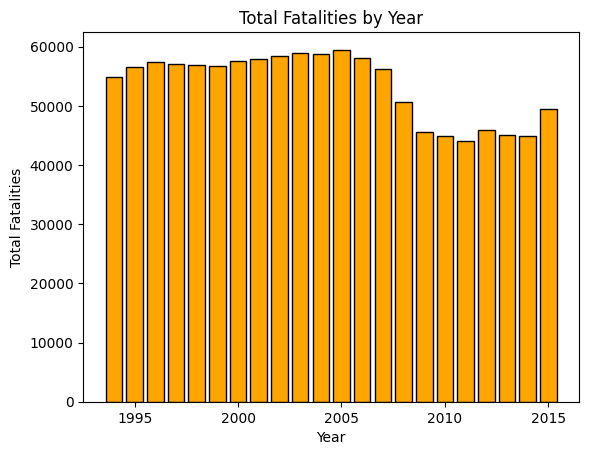

In [6]:
plt.bar(fatalities['Year'], fatalities['Total'], color = 'orange', edgecolor = 'black')
plt.title('Total Fatalities by Year')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.show()

Converting the dataframe to an SQL database

In [8]:
#Creating the SQLite database
conn = sqlite3.connect('../data/final_data.db')
cursor = conn.cursor()

#Creating the table 'fatalities'
cursor.execute("""
CREATE TABLE IF NOT EXISTS fatalities (
    Year INTEGER PRIMARY KEY,
    Passenger Cars INTEGER NOT NULL,
    Light Trucks INTEGER NOT NULL,
    Large Trucks INTEGER NOT NULL,
    Motorcycles INTEGER NOT NULL,
    Buses INTEGER NOT NULL,
    'Other/Unknown' INTEGER NOT NULL,
    Total INTEGER NOT NULL
);
""")

#Inserting the data into the table
fatalities.to_sql('fatalities', conn, if_exists='replace', index = False)

#Verifying that the data was inserted into the table
print('Fatalities Table')
print(pd.read_sql_query('SELECT * FROM fatalities', conn))

conn.commit() #Ensures the data is written to the database
conn.close() #Closes the connection


Fatalities Table
    Year  Passenger Cars  Light Trucks  Large Trucks  Motorcycles  Buses  \
0   2015           19810         18869          4075         5131    263   
1   2014           17895         17160          3749         4707    236   
2   2013           17957         16928          3921         4800    282   
3   2012           18269         17350          3825         5113    253   
4   2011           17508         16806          3633         4769    245   
5   2010           17804         17491          3494         4651    251   
6   2009           18413         17958          3211         4603    221   
7   2008           20474         19179          4089         5409    251   
8   2007           22856         21810          4633         5306    281   
9   2006           24260         22411          4766         4963    305   
10  2005           25169         22964          4951         4682    280   
11  2004           25682         22486          4902         4121    27

Saving the final, cleaned file as a .csv if I want to.

In [ ]:
#fatalities_cleaned.to_csv('../data/fatalities_total_cleaned.csv', index=False)